# 6.2 - Ejemplo EDA (CLV) - Analisis de cliente

## Problema (caso de estudio)

Understand customer demographics and buying behavior and identify the most profitable customers and how they interact.

### Resumen

**Descripcion de los datos**:  

+ **customer :** `ID del cliente`                        
+ **state :** `estados en US`                      
+ **customer_lifetime_value :** `CLV es el valor economico del cliente para la empresa durante toda su relacion`
+ **response :**  `Respuesta a campañas/llamadas (marketing-engagement)`                   
+ **coverage :** `Tipo de cobertura del cliente`                        
+ **education** `Nivel educativo del cliente`                   
+ **effective_to_date :** `Fecha efectiva`              
+ **employmentstatus :** `Estado laboral del cliente`                
+ **gender :**  `Genero del cliente`                  
+ **income :**  `Ingresos del cliente`
+ **location_code :** `Zona de residencia del cliente`                  
+ **marital_status :** `Estado Civil del cliente`                  
+ **monthly_premium_auto :** `Premium mensual`            
+ **months_since_last_claim :** `Ultima reclamacion del cliente`          
+ **months_since_policy_inception :** `Inicio de la poliza`    
+ **number_of_open_complaints :** `Reclamaciones abiertas`        
+ **number_of_policies :** `Numero de polizas`              
+ **policy_type :** `Tipo de poliza`                     
+ **policy :** `Poliza`                         
+ **renew_offer_type :**  `Oferta de renovacion`                 
+ **sales_channel :**  `Canal de ventas (primer contacto compañia-cliente)`                 
+ **total_claim_amount :** `Monto de la reclamacion`              
+ **vehicle_class :**  `Tipo de vehiculo`                 
+ **vehicle_size :**  `Tamaño del vehiculo`  


**Objetivo:**

Mejorar el CLV a traves del marketing.

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Interpretar y solucionar
sns.set_theme(color_codes=True)

import plotly.express as px

import warnings
warnings.simplefilter("ignore")

## Obtener datos

In [2]:
# Solucionar este problema
data = pd.read_csv("data/Marketing-Customer-Analysis.csv")
# Entender esta instrucción
data.columns = [col.lower().replace(" ", "_") for col in data.columns]

data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
data.shape

(9134, 24)

In [9]:
data.info() # habría que limpiar el dataframe si fuese necesario

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [10]:
# Rellenar lo que falta
data["customer"].value_counts() # para saber si hay duplicados

customer
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: count, Length: 9134, dtype: int64

In [30]:
data[data["customer"].duplicated()]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size


## Analisis exploratorio

#### Objetivo

In [29]:
# Conocer bien la variable objetivo
# Cambiar sintaxis
data["customer_lifetime_value"].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: customer_lifetime_value, dtype: float64

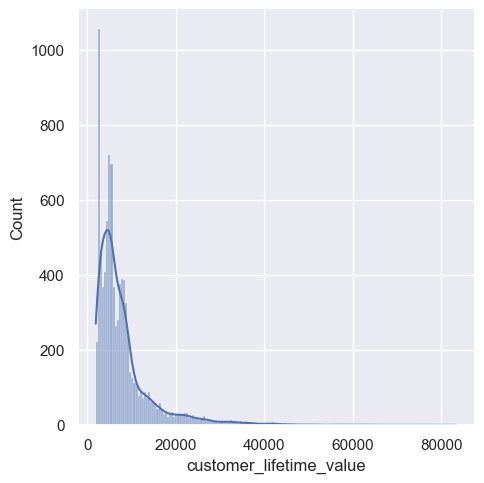

In [42]:
# Pintamos los datos
# Actualizar, sintaxis
# cambiar el rango del eje x: https://stackoverflow.com/questions/54822884/how-to-change-the-x-axis-range-in-seaborn
sns.displot(data["customer_lifetime_value"], kde=True)

<Axes: xlabel='customer_lifetime_value', ylabel='Density'>

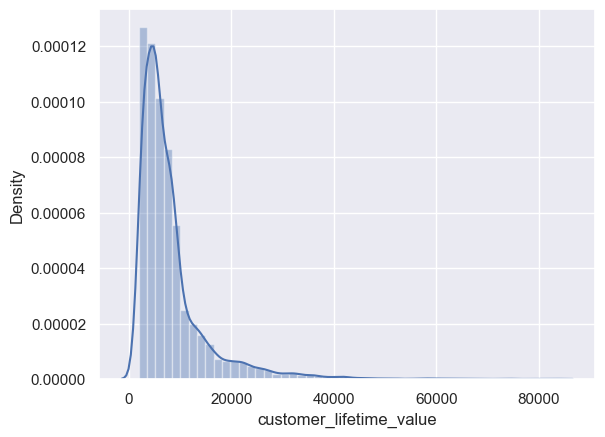

In [44]:
sns.distplot(data["customer_lifetime_value"], kde=True)

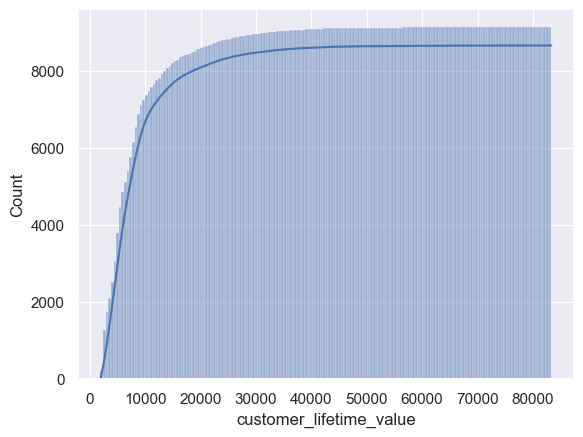

In [70]:
# Actualizar, sintaxis, entender
# cambiar el rango del eje x: https://stackoverflow.com/questions/54822884/how-to-change-the-x-axis-range-in-seaborn
sns.histplot(data["customer_lifetime_value"], cumulative=True, kde=True);


In [71]:
data["customer_lifetime_value"].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: customer_lifetime_value, dtype: float64

<Axes: xlabel='customer_lifetime_value', ylabel='Density'>

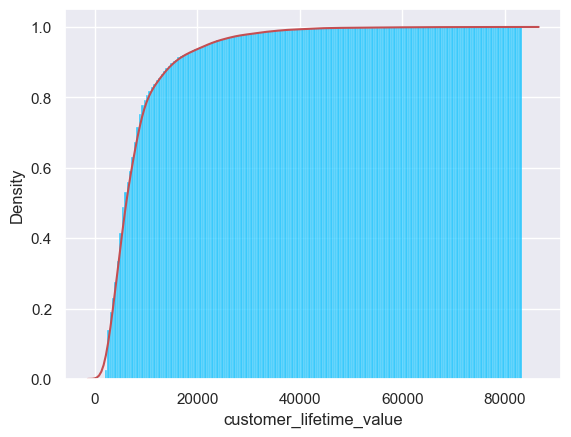

In [68]:
sns.kdeplot(data["customer_lifetime_value"], color='r', cumulative=True)
sns.histplot(data["customer_lifetime_value"], color='deepskyblue', stat='density', cumulative=True)


#### a) Numero total de clientes que responden a las campañas de marketing (engagement)

In [73]:
# Para ver info de la variable
# Cambiar sintaxis
data["response"].value_counts()

response
No     7826
Yes    1308
Name: count, dtype: int64

In [76]:
# Cambiar sintaxis
data["response"].value_counts(normalize=True) #lo pasa a %

response
No     0.856799
Yes    0.143201
Name: proportion, dtype: float64

<Axes: xlabel='response', ylabel='percent'>

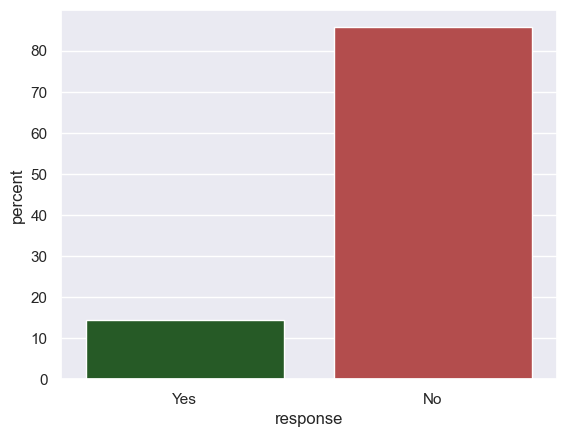

In [98]:
# Cambiar colores al gráfico: No es rojo y Si es verde
# Cambiar orden, primero el sí y luego el no 
sns.countplot(x="response", data=data, order=["Yes", "No"], palette=["green", "red"], saturation=0.4,stat="percent")

**Esto nos muestra que solo el 14% de los clientes responden positivamente a las campañas.**

#### b) Oferta de renovacion

Nos fijaremos en los datos de las ofertas de renovacion. Buscaremos que tipo de oferta funciona mejor para los clientes.

In [99]:
# Cambiar sintaxis
data.renew_offer_type.unique()

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

In [142]:
# Qué porcentaje de clientes acepta cada tipo de oferta de entre los que responden a las campañas
# Offer 1: enviado a 3752 clientes y 594 respondieron a la campaña

# entender, cambiar sintaxis
ofertas = data.groupby("renew_offer_type", as_index=False).count()[["renew_offer_type", "customer"]]
ofertas.rename(columns={"customer":"total"}, inplace=True)


# Lo mismo pero haciéndolo en una tabla
renuevan = data.loc[data.response.str.contains("Yes")].groupby("renew_offer_type", as_index=False).count()[["renew_offer_type", "customer"]]
display(ofertas)
display(renuevan)

# Tabla final 
tipo_oferta = ofertas.merge(renuevan, how="left").fillna(0)
tipo_oferta["porcentaje"] = round(100*(tipo_oferta.customer/tipo_oferta.total), 2)
display(tipo_oferta)

,renew_offer_type,total
0,Offer1,3752
1,Offer2,2926
2,Offer3,1432
3,Offer4,1024


,renew_offer_type,customer
0,Offer1,594
1,Offer2,684
2,Offer3,30


,renew_offer_type,total,customer,porcentaje
0,Offer1,3752,594.0,15.83
1,Offer2,2926,684.0,23.38
2,Offer3,1432,30.0,2.09
3,Offer4,1024,0.0,0.00


In [135]:
# replicar con este codigo
n = data.groupby(["renew_offer_type", "response"], as_index=False).count()[["response", "renew_offer_type", "customer"]]
table = n.pivot_table(values="customer",index=["renew_offer_type"], columns="response", aggfunc="sum")

In [136]:
table.fillna(0, inplace=True)

In [137]:
table
table.fillna(0, inplace=True)

response,No,Yes
renew_offer_type,,
Offer1,3158.0,594.0
Offer2,2242.0,684.0
Offer3,1402.0,30.0
Offer4,1024.0,0.0


In [133]:
table["total"] = table["Yes"] + table["No"]
table.rename(columns={"Yes":"customer"},inplace=True)
#table["customer"] = table["Yes"] y luego haces un drop de Yes para no tenerla repetida
table.drop(columns=["No"], inplace=True)
table["porcentaje"] = 100*table["customer"]/table["total"]

In [134]:
table

response,customer,total,porcentaje
renew_offer_type,,,
Offer1,594.0,3752.0,15.831557
Offer2,684.0,2926.0,23.376623
Offer3,30.0,1432.0,2.094972
Offer4,0.0,1024.0,0.000000


In [143]:
# otra forma
data.groupby(["renew_offer_type"])["response"].agg(total = lambda x: x.count(), customer = lambda x: (x=="Yes").sum(), 
                                                    porcentaje = lambda x:  (x=="Yes").sum()/x.count())

,total,customer,porcentaje
renew_offer_type,,,
Offer1,3752,594,0.158316
Offer2,2926,684,0.233766
Offer3,1432,30,0.020950
Offer4,1024,0,0.000000


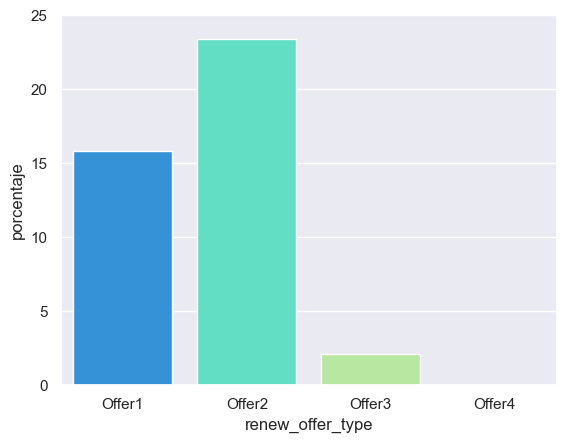

In [153]:
# Cambiar eje y para ver mejor
# Cambiar colores
sns.barplot(x="renew_offer_type", y="porcentaje", data=tipo_oferta, palette="rainbow")
import matplotlib.pyplot as plt
plt.ylim(0,25);

In [163]:
offer = data.groupby(["renew_offer_type", "response"], as_index=False)["customer_lifetime_value"].sum()

In [166]:
offer["customer_lifetime_value"] =offer["customer_lifetime_value"]/1_000_000

In [169]:
offer[offer["response"]=="Yes"]

,renew_offer_type,response,customer_lifetime_value
1,Offer1,Yes,5.287840
3,Offer2,Yes,4.773150
5,Offer3,Yes,0.213182


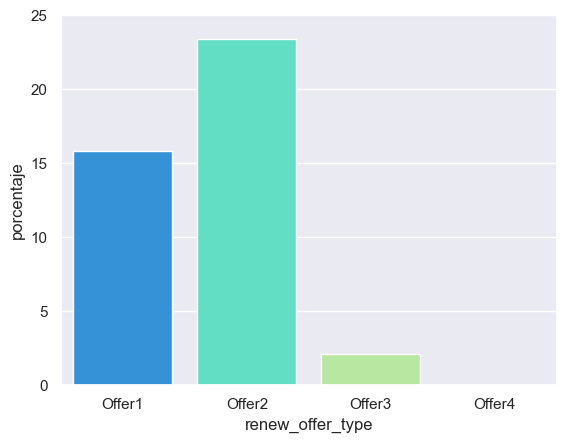

In [ ]:
# Cambiar eje y para ver mejor
# Cambiar colores
sns.barplot(x="renew_offer_type", y="porcentaje", data=tipo_oferta, palette="rainbow")
import matplotlib.pyplot as plt
plt.ylim(0,25);

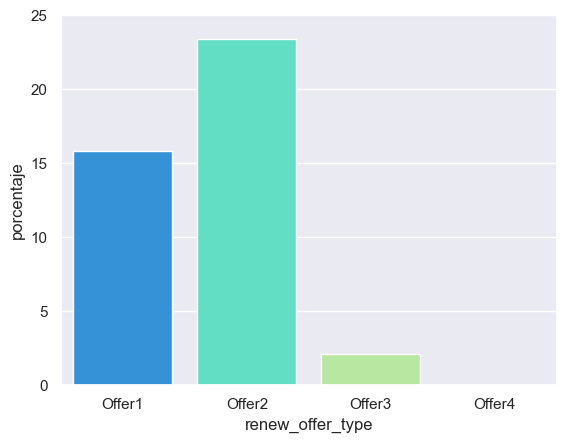

In [ ]:
# Cambiar eje y para ver mejor
# Cambiar colores
sns.barplot(x="renew_offer_type", y="porcentaje", data=tipo_oferta, palette="rainbow")
import matplotlib.pyplot as plt
plt.ylim(0,25);

**Podemos ver que la oferta tipo 2 tiene mayor engagement**

#### c) Renovacion/Atributo

Ahora vamos a intentar entender como los clientes con diferentes atributos responden a los mensajes de marketing.
Empezaremos observando la respuesta para cada tipo de oferta y clase de vehiculo.

In [3]:
# Entender, cambiar sintaxis 
group1, group2 = "renew_offer_type", "vehicle_class"
resp = "Yes"

df1 = data.loc[data.response==resp].groupby([group1, group2], as_index=False).count()[[group1,group2,"customer"]]
df1.rename(columns={"customer":"renuevan"}, inplace=True)
display(df1)

total = data.groupby(group1, as_index=False).count()[[group1, "customer"]]
display(total)

df2 = df1.merge(total, how="left").fillna(0)
df2["porcentaje"] = round(100*(df2.renuevan/df2.customer), 2)
df2

,renew_offer_type,vehicle_class,renuevan
0,Offer1,Four-Door Car,264
1,Offer1,Luxury Car,6
2,Offer1,Luxury SUV,18
3,Offer1,SUV,168
4,Offer1,Sports Car,42
5,Offer1,Two-Door Car,96
6,Offer2,Four-Door Car,336
7,Offer2,Luxury Car,6
8,Offer2,Luxury SUV,12
9,Offer2,SUV,120


,renew_offer_type,customer
0,Offer1,3752
1,Offer2,2926
2,Offer3,1432
3,Offer4,1024


,renew_offer_type,vehicle_class,renuevan,customer,porcentaje
0,Offer1,Four-Door Car,264,3752,7.04
1,Offer1,Luxury Car,6,3752,0.16
2,Offer1,Luxury SUV,18,3752,0.48
3,Offer1,SUV,168,3752,4.48
4,Offer1,Sports Car,42,3752,1.12
5,Offer1,Two-Door Car,96,3752,2.56
6,Offer2,Four-Door Car,336,2926,11.48
7,Offer2,Luxury Car,6,2926,0.21
8,Offer2,Luxury SUV,12,2926,0.41
9,Offer2,SUV,120,2926,4.10


In [10]:
df2.head(20)

,renew_offer_type,vehicle_class,renuevan,customer,porcentaje
0,Offer1,Four-Door Car,264,3752,7.04
1,Offer1,Luxury Car,6,3752,0.16
2,Offer1,Luxury SUV,18,3752,0.48
3,Offer1,SUV,168,3752,4.48
4,Offer1,Sports Car,42,3752,1.12
5,Offer1,Two-Door Car,96,3752,2.56
6,Offer2,Four-Door Car,336,2926,11.48
7,Offer2,Luxury Car,6,2926,0.21
8,Offer2,Luxury SUV,12,2926,0.41
9,Offer2,SUV,120,2926,4.10


In [66]:
# otra forma
df_t = data.groupby(["renew_offer_type", "vehicle_class"], as_index=False)["response"].agg(customer = lambda x: x.count(), renuevan = lambda x: (x=="Yes").sum(), 
                                                    porcentaje = lambda x:  (x=="Yes").sum()/x.count())
df_t["porcenjate_2"] = 100*df_t["renuevan"]/df_t.groupby(["renew_offer_type"]).transform(lambda x: x.sum())["customer"]


In [67]:
df_t

,renew_offer_type,vehicle_class,customer,renuevan,porcentaje,porcenjate_2
0,Offer1,Four-Door Car,1797,264,0.146912,7.036247
1,Offer1,Luxury Car,68,6,0.088235,0.159915
2,Offer1,Luxury SUV,89,18,0.202247,0.479744
3,Offer1,SUV,892,168,0.188341,4.477612
4,Offer1,Sports Car,227,42,0.185022,1.119403
5,Offer1,Two-Door Car,679,96,0.141384,2.558635
6,Offer2,Four-Door Car,1533,336,0.219178,11.483254
7,Offer2,Luxury Car,41,6,0.146341,0.205058
8,Offer2,Luxury SUV,47,12,0.255319,0.410116
9,Offer2,SUV,480,120,0.250000,4.101162


In [48]:
gb = df_t.groupby(["renew_offer_type"])["customer"].sum().to_frame().reset_index() # + merge con dt_T en renew_offer_type es un transform


In [52]:
gb

,renew_offer_type,customer
0,Offer1,3752
1,Offer2,2926
2,Offer3,1432
3,Offer4,1024


In [53]:
for i, row in gb.iterrows():
    df_t.loc[df_t["renew_offer_type"]==row["renew_offer_type"], "porcentaje_2"] = df_t[df_t["renew_offer_type"]==row["renew_offer_type"]]["renuevan"]/row["customer"]

In [54]:
df_t

,renew_offer_type,vehicle_class,customer,renuevan,porcentaje,porcentaje_2
0,Offer1,Four-Door Car,1797,264,0.146912,0.070362
1,Offer1,Luxury Car,68,6,0.088235,0.001599
2,Offer1,Luxury SUV,89,18,0.202247,0.004797
3,Offer1,SUV,892,168,0.188341,0.044776
4,Offer1,Sports Car,227,42,0.185022,0.011194
5,Offer1,Two-Door Car,679,96,0.141384,0.025586
6,Offer2,Four-Door Car,1533,336,0.219178,0.114833
7,Offer2,Luxury Car,41,6,0.146341,0.002051
8,Offer2,Luxury SUV,47,12,0.255319,0.004101
9,Offer2,SUV,480,120,0.250000,0.041012


In [38]:
data.groupby(["renew_offer_type", "vehicle_class"], as_index=False)["response"].agg(customer = lambda x: x.count(), renuevan = lambda x: (x=="Yes").sum(), 
                                                    porcentaje = lambda x:  (x=="Yes").sum()/x.count()).head(5)

,renew_offer_type,vehicle_class,customer,renuevan,porcentaje
0,Offer1,Four-Door Car,1797,264,0.146912
1,Offer1,Luxury Car,68,6,0.088235
2,Offer1,Luxury SUV,89,18,0.202247
3,Offer1,SUV,892,168,0.188341
4,Offer1,Sports Car,227,42,0.185022


In [64]:
# Interpretar
# Porcentaje relativo a la oferta de tipo de coche o a la suma de la oferta total
fig = px.histogram(df2, x=group1, y="porcentaje", color=group2, barmode="group", height=400)
fig.show()

In [65]:
fig = px.histogram(df_t, x=group1, y="porcentaje", color=group2, barmode="group", height=400)
fig.show()

In [ ]:
# Interpretar
# Porcentaje relativo a la oferta de tipo de coche o a la suma de la oferta total
fig = px.histogram(df2, x=group1, y="porcentaje", color=group2, barmode="group", height=400)
fig.show()

In [59]:
group2

'vehicle_class'

group1

In [57]:
group1

'renew_offer_type'

In [ ]:
# replicar con este codigo
# Sin as_index!
#n = data.groupby(["renew_offer_type", "vehicle_class", "response"], as_index=False).count()[["response","vehicle_class","renew_offer_type", "customer"]]
#n
#n.pivot_table(values="customer",index=["renew_offer_type"], columns="response", aggfunc="sum")
# Otra foram
#n = data.groupby(["renew_offer_type", "vehicle_class", "response"]).count()[["customer"]]
#n
#n.pivot_table(values="customer",index=["renew_offer_type", "vehicle_class"], columns="response", aggfunc="sum")

In [63]:
# Entneder, cambiar sintaxis
def engage(resp, group1, group2):
    
    df1 = data.loc[data.response==resp].groupby([group1,group2],as_index=False).count()[[group1,group2,'customer']]
    df1.rename(columns={'customer':'renuevan'},inplace=True)
    
    total = data.groupby(group1,as_index=False).count()[[group1,'customer']]
    
    df2 = df1.merge(total,how='left').fillna(0)
    df2['porcentaje'] = round(100*df2.renuevan/df2.customer,2)
    
    fig = px.histogram(df2, x=group1, y="porcentaje",
                 color=group2, barmode='group',
                 height=400)
    fig.show()
    
    return df2

In [57]:
engage("Yes", "renew_offer_type", "vehicle_class")

,renew_offer_type,vehicle_class,renuevan,customer,porcentaje
0,Offer1,Four-Door Car,264,3752,7.04
1,Offer1,Luxury Car,6,3752,0.16
2,Offer1,Luxury SUV,18,3752,0.48
3,Offer1,SUV,168,3752,4.48
4,Offer1,Sports Car,42,3752,1.12
5,Offer1,Two-Door Car,96,3752,2.56
6,Offer2,Four-Door Car,336,2926,11.48
7,Offer2,Luxury Car,6,2926,0.21
8,Offer2,Luxury SUV,12,2926,0.41
9,Offer2,SUV,120,2926,4.10


**Ya sabiamos que el tipo 2 de oferta tenia la respuesta mas alta entre los clientes, aunque ahora se pueden ver mas cosas cruzando con otros atributos, por ejemplo, la clase vehiculo. Los clientes con vehiculos de 4 puertas responden con mayor frecuencia a todo tipo de ofertas, y aquellos clientes con Luxury SUV responden con mas alta frecuecia las ofertas tipo 1 y 2. Si tenemos diferencias significativas entre las tasas de respuesta entre los clientes, podemos ajustar el objetivo de las distintas ofertas.**

In [55]:
engage("Yes", "renew_offer_type", "state")

NameError: name 'engage' is not defined

In [52]:
engage("Yes", "renew_offer_type", "policy_type")

,renew_offer_type,policy_type,renuevan,customer,porcentaje
0,Offer1,Corporate Auto,126,3752,3.36
1,Offer1,Personal Auto,445,3752,11.86
2,Offer1,Special Auto,23,3752,0.61
3,Offer2,Corporate Auto,156,2926,5.33
4,Offer2,Personal Auto,492,2926,16.81
5,Offer2,Special Auto,36,2926,1.23
6,Offer3,Corporate Auto,6,1432,0.42
7,Offer3,Personal Auto,21,1432,1.47
8,Offer3,Special Auto,3,1432,0.21


In [53]:
engage("No", "renew_offer_type", "policy_type")

,renew_offer_type,policy_type,renuevan,customer,porcentaje
0,Offer1,Corporate Auto,701,3752,18.68
1,Offer1,Personal Auto,2331,3752,62.13
2,Offer1,Special Auto,126,3752,3.36
3,Offer2,Corporate Auto,441,2926,15.07
4,Offer2,Personal Auto,1709,2926,58.41
5,Offer2,Special Auto,92,2926,3.14
6,Offer3,Corporate Auto,302,1432,21.09
7,Offer3,Personal Auto,1046,1432,73.04
8,Offer3,Special Auto,54,1432,3.77
9,Offer4,Corporate Auto,236,1024,23.05


#### d) Analizando la tasas de respuesta por genero

In [61]:
def engage_1(resp, group1):
    
    df1 = data.loc[data.response==resp].groupby(group1,as_index=False).count()[[group1,'customer']]
    df1.rename(columns={'customer':'renuevan'},inplace=True)
    
    total = data.groupby(group1,as_index=False).count()[[group1,'customer']]
    
    df2 = df1.merge(total,how='left').fillna(0)
    df2['porcentaje'] = round(100*df2.renuevan/df2.customer,2)
    
    fig = px.histogram(df2, x=group1, y="porcentaje", barmode='group',
                 height=400)
    fig.show()
    
    return df2

In [57]:
data.gender.value_counts(normalize=True)

F    0.509963
M    0.490037
Name: gender, dtype: float64

In [62]:
engage_1("Yes", "gender")

,gender,renuevan,customer,porcentaje
0,F,660,4658,14.17
1,M,648,4476,14.48


In [64]:
engage("Yes", "gender", "vehicle_class")

,gender,vehicle_class,renuevan,customer,porcentaje
0,F,Four-Door Car,324,4658,6.96
1,F,Luxury Car,12,4658,0.26
2,F,Luxury SUV,18,4658,0.39
3,F,SUV,150,4658,3.22
4,F,Sports Car,30,4658,0.64
5,F,Two-Door Car,126,4658,2.71
6,M,Four-Door Car,300,4476,6.70
7,M,Luxury SUV,12,4476,0.27
8,M,SUV,138,4476,3.08
9,M,Sports Car,60,4476,1.34


**Las clases estan balanceadas. Pero se puede observar una menor respuesta entre las mujeres. Por otro lado, los hombres con coches de lujo no responden nunca a las campañas de marketing.** (¿Cómo arreglar esto?)

#### e) Analizando la tasa de respuesta por diferentes canales de venta

In [59]:
# Cambiar sintaxis
data.sales_channel.unique()

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

In [60]:
# ¿Modificar función para que sean de otro color? ¿Incluso de distintos colores cada uno?
engage_1("Yes", "sales_channel")

,sales_channel,renuevan,customer,porcentaje
0,Agent,666,3477,19.15
1,Branch,294,2567,11.45
2,Call Center,192,1765,10.88
3,Web,156,1325,11.77


**Como podemos ver, Agent funciona mejor en terminos de obtener respuesta de los clientes, y en segundo lugar Web. Podemos ver otras relaciones.**

In [62]:
engage("Yes", "sales_channel", "renew_offer_type")

,sales_channel,renew_offer_type,renuevan,customer,porcentaje
0,Agent,Offer1,336,3477,9.66
1,Agent,Offer2,312,3477,8.97
2,Agent,Offer3,18,3477,0.52
3,Branch,Offer1,168,2567,6.54
4,Branch,Offer2,126,2567,4.91
5,Call Center,Offer1,42,1765,2.38
6,Call Center,Offer2,150,1765,8.50
7,Web,Offer1,48,1325,3.62
8,Web,Offer2,96,1325,7.25
9,Web,Offer3,12,1325,0.91


**La oferta tipo 3 no funciona en el canal Branch ni en el canal Call Center. La oferta tipo 1 necesita mejorar Call Centers.**

#### e) Clusterizacion Sencilla

Vamos a segmentar a los clientes segun el CLV y segun los meses desde el inicio de la poliza.

Aquellos clientes con un CLV mayor que la mediana, se clasifican como alto CLV (`high`), aquellos por debajo de la mediana como bajo CLV (`low`).

In [64]:
# entender, cambiar sintaxis
# usar +1 desviacion standard
data["clv_segment"] = np.where(data.customer_lifetime_value>data.customer_lifetime_value.median(),
                               "high", "low")
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,clv_segment
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,low
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,high
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,high
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,high
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,high
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,low
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,high
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,high


In [66]:
# cambiar sintaxis
data.months_since_policy_inception.describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: months_since_policy_inception, dtype: float64

In [68]:
# cambiar a media + 0.5 std
data["policy_age_segment"] = np.where(data.months_since_policy_inception>data.months_since_policy_inception.mean(),
                                      "high", "low")
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,clv_segment,policy_Age_segment,policy_age_segment
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,low,low,low
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,high,low,low
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,high,low,low
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,high,high,high
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,low,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,high,high,high
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,low,low,low
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,high,low,low
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,high,low,low


In [69]:
#cambiar sintaxis
data["segmento"] = data.clv_segment + "-" + data.policy_age_segment
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,clv_segment,policy_Age_segment,policy_age_segment,segmento
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,low,low,low,low-low
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,high,low,low,high-low
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,high,low,low,high-low
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,high,high,high,high-high
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,low,low,low,low-low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,high,high,high,high-high
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,low,low,low,low-low
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,high,low,low,high-low
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,high,low,low,high-low


In [71]:
# entender
fig = px.scatter(data, x="months_since_policy_inception", y="customer_lifetime_value", color="segmento", 
                symbol="segmento", log_y=True)
fig.show()

`log_y=True` transforma la escala una escala logaritmica, que se usa a menudo en valores monetario

In [72]:
engage("Yes", "clv_segment", "policy_age_segment")

,clv_segment,policy_age_segment,renuevan,customer,porcentaje
0,high,high,312,4566,6.83
1,high,low,306,4566,6.70
2,low,high,366,4568,8.01
3,low,low,324,4568,7.09


**Podemos ver que el segmento de polizas mas antiguas tiene mayor tasa de respuesta. Esto sugiere que esos clientes que llevan mas tiempo en la compañia responden mejor. De hecho, el mejor segmento de los cuatro en respuesta es el de polizas mas antiguas y bajo CLV. Creando diferentes segmentaciones de los clientes basandonos en sus atributos, podemos tener un mejor entendimiento del comportamiento de los distintos tipos de clientes y, por tanto, desarrollar una mejor estrategia de marketing.**

### Conclusion


+ Objetivo:
    + **Mejorar el CLV** (Media CLV: 8005)
    
+ Insights:
    + Solo el 14% de los clientes responden a campañas de marketing (Mejorar respuesta)
    + La oferta tipo 2 tiene la mayor tasa de respuesta (¿Cual es la diferencia entre las ofertas?)
    + Los clientes con Luxury SUV responden con mayor frecuencia a las ofertas 1 y 2
    + Principalmente enfocado en coches de cuatro puertas 
    + La oferta tipo 3 no es representativa (cambiarla y/o eliminarla, enfoque en coches deportivos y de lujo. Lo mismo con la oferta 4)
    + Las mujeres tienen menor tasa de respuesta 
    + Los hombres con coches de lujo no responden en absoluto
    + La oferta tipo 3 no funciona en los canales de venta branch y call center 
    + La oferta tipo 1 necesita mejorar en call centers 
    + Los clientes mas antiguos responden mejor 